# Analysis of clinical variatns of ORC1 protein

## Prediction of RNA binding and LLPS
Top Variants with Strong Negative Effects - These mutations significantly reduce phase separation and RNA-binding ability:

A.174.V 0.64 [ 0.56, 0.72 ] - no citation
R.396.W 0.66 [ 0.52, 0.8 ] - no citation
A.372.V 0.76 [ 0.84, 0.68 ] - 22689986
G.399.D 0.76 [ 0.92, 0.6 ] - no citation
R.549.C 0.98 [ 0.96, 1 ] - no citation

Top Variants with Strong Positive Effects - These mutations enhance phase separation and RNA-binding ability:

E.73.K 0.764706  [ 0.882353, 0.647059 ] - no citation
L.617.P 0.823529 [ 0.941176, 0.705882 ] - no info
C.186.R 0.882352 [ 0.823529, 0.941176 ] - no citation
L.622.P 0.882353 [ 1, 0.764706 ] - no citation

negative_mutations = ['A174V', 'R396W', 'A372V', 'G399D', 'R549C'] #5
positive_mutations = ['E73K', 'L617P', 'C186R', 'L622P'] #4

In [1]:
# Import libraries
from clinvar_functions import *
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [47]:
# Set option to display all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Read dataframe
df = pd.read_csv('./data/clinvar_result.csv', sep = "\t")
df = df[df['Gene(s)'] == 'ORC1'] # save only ORC1 gene - delete 7 records
df.shape

(333, 25)

## Add new column: Condition_new

In [48]:
df['Condition_new'] = df['Condition(s)'].map(rename_condition, na_action='ignore')
df['Condition_new'].value_counts()

Condition_new
not provided                        211
Meier-Gorlin syndrome 1 probably     42
Meier-Gorlin syndrome 1              30
Inborn genetic diseases              30
Inborn genetic diseases probably     12
ORC1-related disorder probably        6
Name: count, dtype: int64

# Look at the predicted variants

In [50]:
# Prediction of top negatively affected on the LLPS and RNA binding mutations and positively affected ones.
negative_mutations = ['A174V', 'R396W', 'A372V', 'G399D', 'R549C']
positive_mutations = ['E73K', 'L617P', 'C186R', 'L622P']

# Combine the two lists into one regex pattern
search_pattern = '|'.join(negative_mutations + positive_mutations)
negative_mutations_pattern = '|'.join(negative_mutations)

# Make subset
df_LLPS = df[df['Protein change'].str.contains(search_pattern, na=False, case=False)][['Name','Protein change', 'Condition(s)', 'Condition_new', 'Germline review status', 'Germline classification']]
df_LLPS['LLPS_positive'] = ~df_LLPS['Protein change'].str.contains(negative_mutations_pattern, na=False, case=False)
df_LLPS

,Name,Protein change,Condition(s),Condition_new,Germline review status,Germline classification,LLPS_positive
98,NM_004153.4(ORC1):c.1865T>C (p.Leu622Pro),"L617P, L622P",Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1,"criteria provided, single submitter",Pathogenic,True
123,NM_004153.4(ORC1):c.1645C>T (p.Arg549Cys),"R544C, R549C",Meier-Gorlin syndrome 1|not provided|Inborn ge...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,False
189,NM_004153.4(ORC1):c.1196G>A (p.Gly399Asp),G399D,Meier-Gorlin syndrome 1|not provided|Inborn ge...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,False
192,NM_004153.4(ORC1):c.1186C>T (p.Arg396Trp),R396W,not specified|not provided|Meier-Gorlin syndro...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Benign/Likely benign,False
198,NM_004153.4(ORC1):c.1115C>T (p.Ala372Val),A372V,not provided|not specified|Meier-Gorlin syndro...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Benign,False
264,NM_004153.4(ORC1):c.556T>C (p.Cys186Arg),C186R,Inborn genetic diseases|Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,True
270,NM_004153.4(ORC1):c.521C>T (p.Ala174Val),A174V,Meier-Gorlin syndrome 1|Inborn genetic diseases,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,False
313,NM_004153.4(ORC1):c.217G>A (p.Glu73Lys),E73K,Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1,"criteria provided, single submitter",Pathogenic,True


# Annotated variants

In [5]:
# Read selected list of variants of ORC1
path_to_file = "./data/ClinVar_ORC1_Gene_Variants_2025-01_selected.csv"
df_annotated = pd.read_csv(path_to_file)

In [6]:
df_merged = df.merge(df_annotated, on='Name', how='right')[['Name', 'Protein change', 'Condition(s)', 'Condition_new', 'Germline review status', 'Germline classification', 'PubMedID']]
df_merged

,Name,Protein change,Condition(s),Condition_new,Germline review status,Germline classification,PubMedID
0,NM_004153.4(ORC1):c.380A>G (p.Glu127Gly),E127G,Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1,no assertion criteria provided,Pathogenic,21358633.0
1,NM_004153.4(ORC1):c.1999_2000delinsA (p.Val667fs),"V662fs, V667fs",Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1,no assertion criteria provided,Pathogenic,21358632.0
2,NM_004153.4(ORC1):c.1482-2A>G,NaN,Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1,no assertion criteria provided,Pathogenic,21358632.0
3,NM_004153.4(ORC1):c.266T>C (p.Phe89Ser),F89S,ORC1-related disorder|not provided,ORC1-related disorder probably,"criteria provided, conflicting classifications",Conflicting classifications of pathogenicity,21358633.0
4,NM_004153.4(ORC1):c.2159G>A (p.Arg720Gln),"R720Q, R715Q",not provided,not provided,"criteria provided, multiple submitters, no con...",Likely pathogenic,21358633.0
5,NM_004153.4(ORC1):c.1996C>T (p.Arg666Trp),"R666W, R661W",not provided,not provided,"criteria provided, single submitter",Uncertain significance,21358631.0
6,NM_004153.4(ORC1):c.1115C>T (p.Ala372Val),A372V,not provided|not specified|Meier-Gorlin syndro...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Benign,22689986.0
7,NM_004153.4(ORC1):c.2221_2224dup (p.Ser742Ter),"S737*, S742*",not provided|Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1 probably,"criteria provided, conflicting classifications",Conflicting classifications of pathogenicity,21358633.0
8,NM_004153.4(ORC1):c.2231del (p.Gly744fs),"G739fs, G744fs",not provided,not provided,"criteria provided, single submitter",Pathogenic,21358633.0
9,NM_004153.4(ORC1):c.1330C>T (p.Arg444Ter),R444*,not provided,not provided,"criteria provided, single submitter",Pathogenic,21358633.0


PMID and ORC1 variants - manual checking

21358631: R666W, R105Q - pathogenic
11477602: no genotype!
21358632: R105Q, V667fs (protein truncation), intron 9 splice aceptor site (NM_004153.4(ORC1):c.1482-2A>G ?)
21358633: E127G, F89S, R105Q, R720Q, R105Q


In [7]:
df_merged[df_merged['PubMedID']==22689986.0]

,Name,Protein change,Condition(s),Condition_new,Germline review status,Germline classification,PubMedID
6,NM_004153.4(ORC1):c.1115C>T (p.Ala372Val),A372V,not provided|not specified|Meier-Gorlin syndro...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Benign,22689986.0


In [8]:
set(df_merged['PubMedID'])

{11477602.0, 21358631.0, 21358632.0, 21358633.0, 22689986.0}

# Make filtration

In [9]:
# Look at the column values
columns = ['Gene(s)', "Variant type", 'Molecular consequence', 'Germline classification', 'Germline review status',\
           'Somatic clinical impact', 'Oncogenicity classification', 'Oncogenicity review status']
for col in columns:
    print(col, set(df[col]))

Gene(s) {'ORC1'}
Variant type {'Duplication', 'Deletion', 'Indel', 'single nucleotide variant', 'Microsatellite', 'Haplotype'}
Molecular consequence {nan, 'synonymous variant', '3 prime UTR variant', 'splice acceptor variant', 'synonymous variant|intron variant', 'nonsense', 'inframe_deletion|intron variant', 'splice donor variant', 'inframe_deletion', 'frameshift variant', 'intron variant', 'missense variant', 'frameshift variant|missense variant'}
Germline classification {'Conflicting classifications of pathogenicity', 'Likely pathogenic', 'Pathogenic', 'Likely benign', 'Benign/Likely benign', 'Benign', 'Uncertain significance', 'no classification for the single variant', 'Pathogenic/Likely pathogenic'}
Germline review status {'criteria provided, conflicting classifications', 'criteria provided, single submitter', 'no assertion criteria provided', 'no classification for the single variant', 'criteria provided, multiple submitters, no conflicts'}
Somatic clinical impact {nan, 'no clas

In [10]:
# Delete Germline review status with conflicts, no criteria, no classification
df = df[(df['Germline review status']!='criteria provided, conflicting classifications ') & (df['Germline review status']!='no assertion criteria provided') & (df['Germline review status']!='no classification for the single variant')]
df.shape

# Delete Germline classification Benign, Likely benign, with conflicts

df = df[(df['Germline classification']!='Benign') &
        (df['Germline classification']!='Benign/Likely benign') &
        (df['Germline classification']!='Likely benign') &
        (df['Germline classification']!='Conflicting classifications of pathogenicity')]
df.shape

(176, 26)

In [11]:
# Make subset
df_LLPS = df[df['Protein change'].str.contains(search_pattern, na=False, case=False)][['Protein change', 'Condition(s)', 'Condition_new', 'Germline review status', 'Germline classification']]
df_LLPS['LLPS_positive'] = ~df_LLPS['Protein change'].str.contains(negative_mutations_pattern, na=False, case=False)
df_LLPS

,Protein change,Condition(s),Condition_new,Germline review status,Germline classification,LLPS_positive
98,"L617P, L622P",Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1,"criteria provided, single submitter",Pathogenic,True
123,"R544C, R549C",Meier-Gorlin syndrome 1|not provided|Inborn ge...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,False
189,G399D,Meier-Gorlin syndrome 1|not provided|Inborn ge...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,False
264,C186R,Inborn genetic diseases|Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,True
270,A174V,Meier-Gorlin syndrome 1|Inborn genetic diseases,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,False
313,E73K,Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1,"criteria provided, single submitter",Pathogenic,True


## Look at the different columns of df

In [12]:
df["Condition(s)"].value_counts()

Condition(s)
not provided                                                    94
Inborn genetic diseases                                         27
Meier-Gorlin syndrome 1                                         26
not provided|Inborn genetic diseases                             5
not specified                                                    5
Inborn genetic diseases|not provided                             4
Meier-Gorlin syndrome 1|not provided|Inborn genetic diseases     3
not provided|not specified                                       2
Inborn genetic diseases|Meier-Gorlin syndrome 1                  2
Inborn genetic diseases|ORC1-related disorder                    1
not specified|not provided                                       1
not provided|Meier-Gorlin syndrome 1                             1
Meier-Gorlin syndrome 1|not provided                             1
not specified|not provided|Meier-Gorlin syndrome 1               1
Meier-Gorlin syndrome 1|Inborn genetic diseases  

In [13]:
df['Molecular consequence'].value_counts()

Molecular consequence
missense variant                     145
frameshift variant                     7
splice acceptor variant                5
intron variant                         4
synonymous variant                     4
nonsense                               3
3 prime UTR variant                    2
splice donor variant                   2
synonymous variant|intron variant      1
inframe_deletion|intron variant        1
inframe_deletion                       1
Name: count, dtype: int64

## Get list of transcript IDs

In [14]:
IDs = df['Name'].apply(lambda x: x.split(":")[0])
IDs.value_counts()

Name
NM_004153.4(ORC1)       175
NM_001190818.1(ORC1)      1
Name: count, dtype: int64

# Non-coding mutations
## Making subset

In [15]:
print('Number of non-coding mutations is:', sum(df["Protein change"].isna()))
print('Total variants number is:', len(df["Protein change"]))

Number of non-coding mutations is: 20
Total variants number is: 176


In [16]:
# Making a subset of variants that are not affected protein level
noncoding = df[df["Protein change"].isna()]

## Non-coding variants visualization

List of Exons of ORC1 (file hg38_dna range=chr1:52372829-52404423):
exon          	1..547        
exon          	1982..2069    
exon          	2602..2771    
exon          	8814..8933    
exon          	10.592..10.741
exon          	11.002..11.109
exon          	11.722..11.893
exon          	12.333..12.434
exon          	13.024..13.121
exon          	15.614..15.809
exon          	16.389..16.493
exon          	20.615..20.975
exon          	23.218..23.536
exon          	24.857..25.035
exon          	28.534..28.661
exon          	29.301..29.400
exon          	31.418..31.595

List of regulation elements (file hg38_dna range=chr1:52372829-52404423):
enhancer_distal 12585...12893
enhancer_proximal 30091..30367
enhancer_proximal 30826..31175
enhancer_proximal 31239..31442
promoter (partial) 31531..31595

Gene length: 31595 bp
Positions: 52372829 - 52404423

In [17]:
# Subset of data from noncoding dataframe

# Filter the data for multiple conditions
MGS_non_coding_muts = noncoding[
    (noncoding['Condition_new'] == 'Meier-Gorlin syndrome 1') &
    (noncoding['Germline review status'] == 'criteria provided, single submitter') &
    (noncoding['Germline classification']!='Benign') &
    (noncoding['Germline classification']!='Benign/Likely benign')
][['GRCh38Location', 'Name', 'Condition_new', 'Accession', "Germline classification", 'Molecular consequence', 'Germline classification']]

# Filter the data for multiple conditions
MGS_probable_non_coding_muts = noncoding[
    (noncoding['Condition_new'] == 'Meier-Gorlin syndrome 1 probably') &
    (noncoding['Germline review status'] == 'criteria provided, multiple submitters, no conflicts') &
    (noncoding['Germline classification']!='Benign') &
    (noncoding['Germline classification']!='Benign/Likely benign')
][['GRCh38Location', 'Name', 'Condition_new', 'Accession', "Germline classification", 'Molecular consequence', 'Germline classification']]

# Create new column New_location
MGS_non_coding_muts["New_location"] = MGS_non_coding_muts['GRCh38Location'].apply(parse_location).astype(int).apply(lambda x: adjust_location(x, 52372828))
MGS_probable_non_coding_muts["New_location"] = MGS_probable_non_coding_muts['GRCh38Location'].apply(parse_location).astype(int).apply(lambda x: adjust_location(x, 52372828))

# Create new column New_name

MGS_non_coding_muts["New_name"] = MGS_non_coding_muts['Name'].apply(lambda x: x.split(":")[1])
MGS_probable_non_coding_muts["New_name"] = MGS_probable_non_coding_muts['Name'].apply(lambda x: x.split(":")[1])

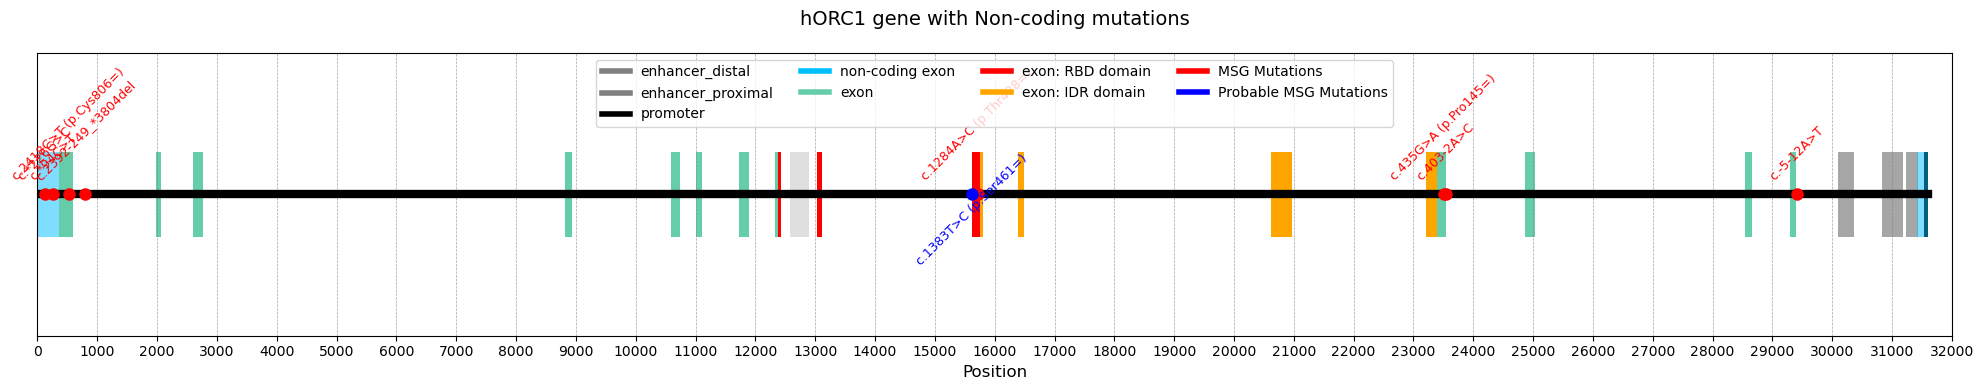

In [18]:
# Define protein information
protein_length = 31595  # Gene length
domains = [
    # regulatory elements
    {"name": "enhancer_distal", "start": 12585, "end": 12893, "color": "grey", "alpha": 0.25},
    {"name": "enhancer_proximal", "start": 30091, "end": 30367, "color": "grey", "alpha": 0.7},
    {"name": "enhancer_proximal", "start": 30826, "end": 31175, "color": "grey", "alpha": 0.7},
    {"name": "enhancer_proximal", "start": 31239, "end": 31442, "color": "grey", "alpha": 0.7},
    {"name": "promoter", "start": 31531, "end": 31595, "color": "black", "alpha": 1},

    {"name": "non-coding exon", "start": 1, "end": 352, "color": "deepskyblue", "alpha": 0.5},
    {"name": "exon", "start": 353, "end": 597, "color": "mediumaquamarine", "alpha": 1},

    {"name": "exon", "start": 1982, "end": 2069, "color": "mediumaquamarine", "alpha": 1},
    {"name": "exon", "start": 2602, "end": 2771, "color": "mediumaquamarine", "alpha": 1},
    {"name": "exon", "start": 8814, "end": 8933, "color": "mediumaquamarine", "alpha": 1},
    {"name": "exon", "start": 10592, "end": 10741, "color": "mediumaquamarine", "alpha": 1},
    {"name": "exon", "start": 11002, "end": 11109, "color": "mediumaquamarine", "alpha": 1},
    {"name": "exon", "start": 11722, "end": 11893, "color": "mediumaquamarine", "alpha": 1},

    # IDR end
    {"name": "exon", "start": 12333, "end": 12382, "color": "mediumaquamarine", "alpha": 1},
    {"name": "exon: RBD domain", "start": 12383, "end": 12434, "color": "red", "alpha": 1},

    {"name": "exon: RBD domain", "start": 13024, "end": 13121, "color": "red", "alpha": 1},

    # RBD start
    {"name": "exon: IDR domain", "start": 15760, "end": 15809, "color": "orange", "alpha": 1},
    {"name": "exon: IDR domain", "start": 15614, "end": 15759, "color": "red", "alpha": 1},

    {"name": "exon: IDR domain", "start": 16389, "end": 16493, "color": "orange", "alpha": 1},
    {"name": "exon: IDR domain", "start": 20615, "end": 20975, "color": "orange", "alpha": 1},
    
    # IDR start
    {"name": "exon: IDR domain", "start": 23218, "end": 23392, "color": "orange", "alpha": 1},
    {"name": "exon", "start": 23393, "end": 23536, "color": "mediumaquamarine", "alpha": 1},

    {"name": "exon", "start": 24857, "end": 25035, "color": "mediumaquamarine", "alpha": 1},
    {"name": "exon", "start": 28534, "end": 28661, "color": "mediumaquamarine", "alpha": 1},

    {"name": "exon", "start": 29301, "end": 29396, "color": "mediumaquamarine", "alpha": 1},
    {"name": "non-coding exon", "start": 29397, "end": 29400, "color": "deepskyblue", "alpha": 1},

    {"name": "exon", "start": 31418, "end": 31595, "color": "deepskyblue", "alpha": 0.5}
]


# Create the figure
fig, ax = plt.subplots(figsize=(20, 4))

# Draw the protein backbone
ax.plot([0, protein_length], [0.5, 0.5], color="black", lw=6, label="Protein Backbone")

# Track unique labels for the legend
unique_labels = {}

# Draw the domains with labels
for domain in domains:
    label = f"{domain['name']}"
    if label not in unique_labels:
        unique_labels[label] = domain["color"]
    ax.barh(0.5, domain["end"] - domain["start"], left=domain["start"], height=0.3,
            color=domain["color"], alpha=domain["alpha"], label=None)  # Add label only for legend
    
# Plot mutations
for _, mutation in MGS_non_coding_muts.iterrows():
    ax.plot(
        mutation["New_location"],
        0.5,
        marker="o",
        color="red",
        markersize=8,
        label="Mutation" if _ == 0 else ""
    )
    ax.text(
        mutation["New_location"],
        0.55,
        mutation["New_name"],
        ha="center",
        fontsize=9,
        rotation=45,
        color="red"
    )

unique_labels["MSG Mutations"] = "red"
unique_labels["Probable MSG Mutations"] = "blue"

# Plot mutations
for _, mutation in MGS_probable_non_coding_muts.iterrows():
    ax.plot(
        mutation["New_location"],
        0.5,
        marker="o",
        color="blue",
        markersize=8,
        label="Mutation" if _ == 0 else ""
    )
    ax.text(
        mutation["New_location"],
        0.25,
        mutation["New_name"],
        ha="center",
        fontsize=9,
        rotation=45,
        color="blue"
    )



# Add the unique legend
ax.legend(handles=[plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in unique_labels.items()],
          loc="upper center", ncol=4, frameon=True, fontsize=10)

# Add gridlines for alignment
ax.grid(axis="x", color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Add labels and title
ax.set_xlim(0, protein_length)
ax.set_ylim(0, 1)
ax.set_xticks(range(0, protein_length + 1000, 1000))
ax.set_yticks([])
ax.set_xlabel("Position", fontsize=12)
ax.set_title("hORC1 gene with Non-coding mutations", fontsize=14, pad=20)

# Show the plot
plt.tight_layout()
plt.show()


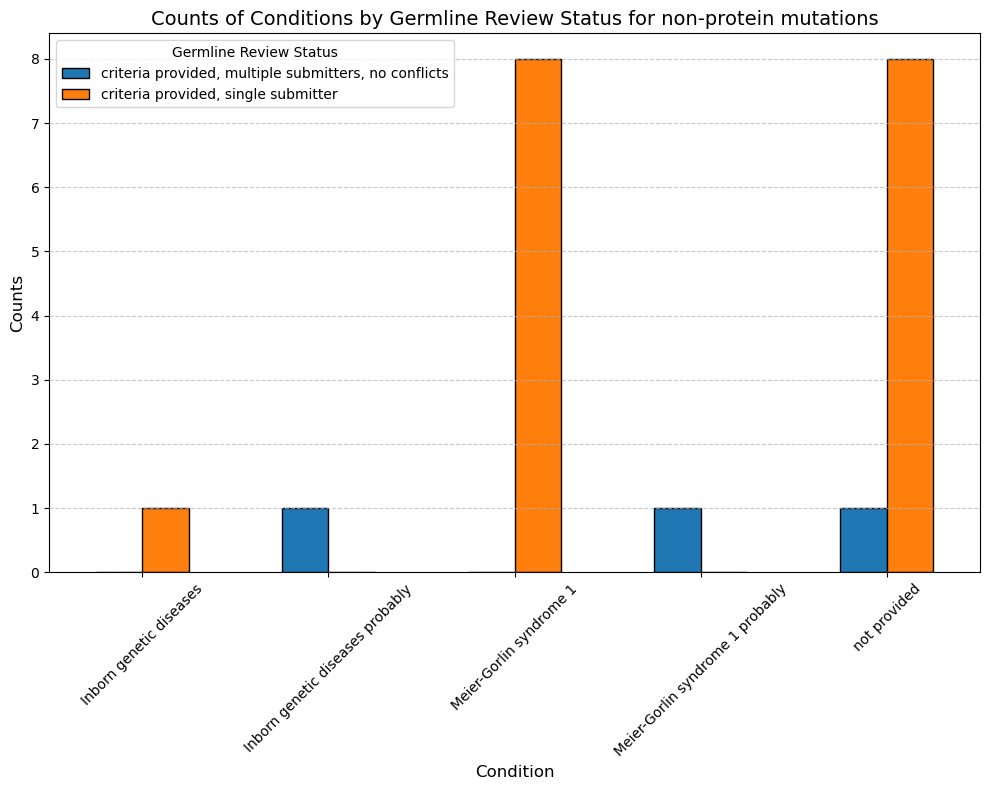

In [19]:
# Data
grouped_counts = noncoding.groupby("Germline review status")["Condition_new"].value_counts()
plot_data = grouped_counts.reset_index(name="Counts")
plot_data

# Pivot the data for better visualization
pivot_data = plot_data.pivot(index="Condition_new", columns="Germline review status", values="Counts")

# Plot as a bar chart
pivot_data.plot(kind="bar", figsize=(10, 8), edgecolor="black")

plt.title("Counts of Conditions by Germline Review Status for non-protein mutations", fontsize=14)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Germline Review Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

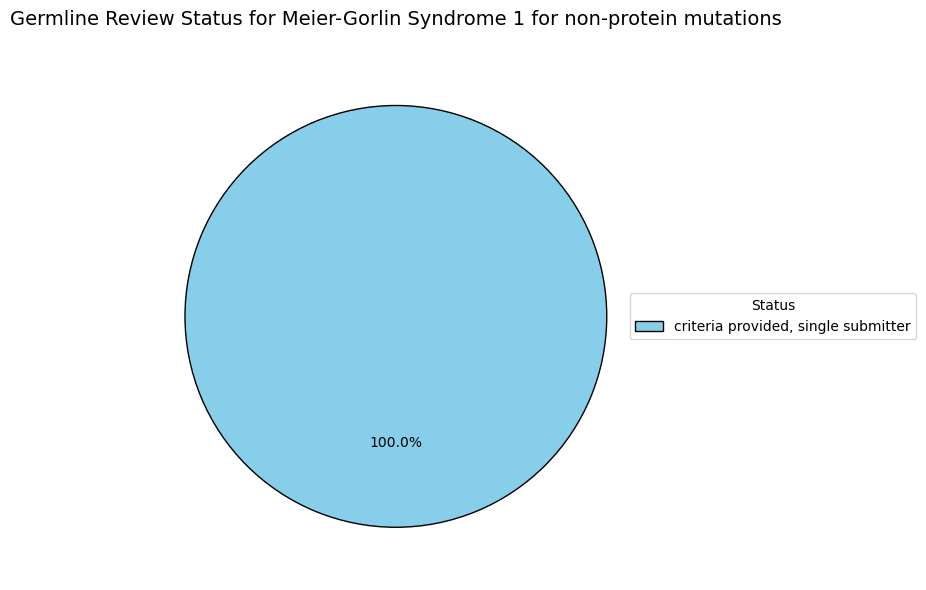

In [20]:
# Filter the data for the specific condition
filtered_data = noncoding['Germline review status'][df["Condition_new"] =="Meier-Gorlin syndrome 1"]
# Count the occurrences of each status
status_counts = filtered_data.value_counts()

# Count the occurrences of each status
status_counts = filtered_data.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie_chart = status_counts.plot.pie(
    labels=None,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate start angle
    colors=['skyblue', 'lightgreen', 'orange'],  # Optional: specify colors
    wedgeprops={'edgecolor': 'black'},  # Add edge color
    title="Germline Review Status for Meier-Gorlin Syndrome 1 for non-protein mutations"
)
# Add a centered title
plt.title(
    "Germline Review Status for Meier-Gorlin Syndrome 1 for non-protein mutations", 
    loc="center",          # Explicitly center the title
    fontsize=14,           # Adjust font size for visibility
    pad=20                 # Add padding between the title and the chart
)

# Add a legend at the center right
plt.legend(
    labels=status_counts.index,  # Use the status names as labels
    title="Status",              # Add a title to the legend
    loc="center right",          # Position the legend at the center-right
    bbox_to_anchor=(1.50, 0.5),  # Offset for better alignment
)

plt.ylabel("")  # Remove default y-axis label
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

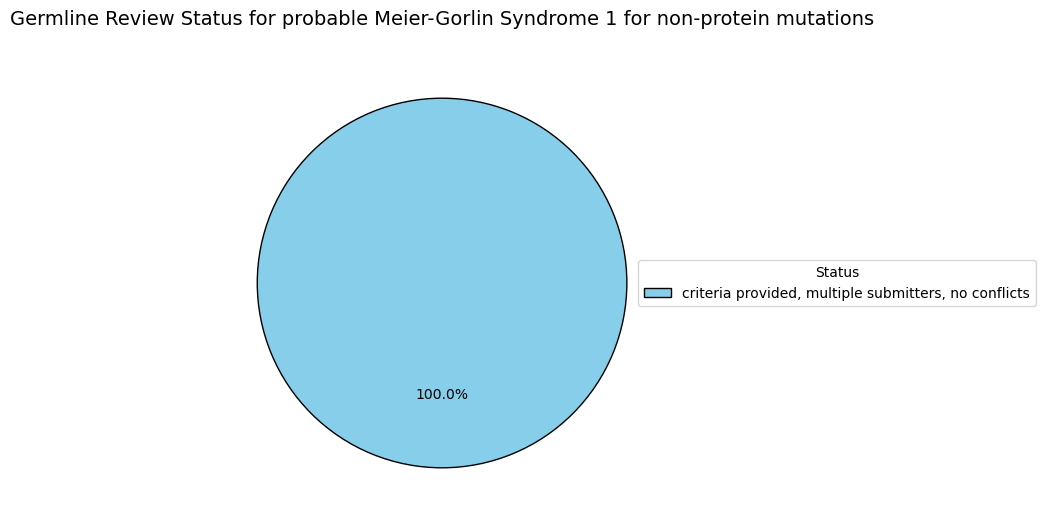

In [21]:
# Filter the data for the specific condition
filtered_data = noncoding['Germline review status'][df["Condition_new"] =="Meier-Gorlin syndrome 1 probably"]
# Count the occurrences of each status
status_counts = filtered_data.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
status_counts.plot.pie(
    labels=None,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate start angle
    colors=['skyblue', 'lightgreen', 'orange'],  # Optional: specify colors
    wedgeprops={'edgecolor': 'black'},  # Add edge color
    title="Germline Review Status for probable Meier-Gorlin Syndrome 1"
)
# Add a centered title
plt.title(
    "Germline Review Status for probable Meier-Gorlin Syndrome 1 for non-protein mutations", 
    ha="center",          # Explicitly center the title
    fontsize=14,           # Adjust font size for visibility
    pad=20
    )

# Add a legend at the center right
plt.legend(
    labels=status_counts.index,  # Use the status names as labels
    title="Status",              # Add a title to the legend
    loc="center right",          # Position the legend at the center-right
    bbox_to_anchor=(1.80, 0.5),  # Offset for better alignment
)

plt.ylabel("")  # Remove default y-axis label
plt.show()

# Protein coding mutations Visualisation

## Analyse Germline review status

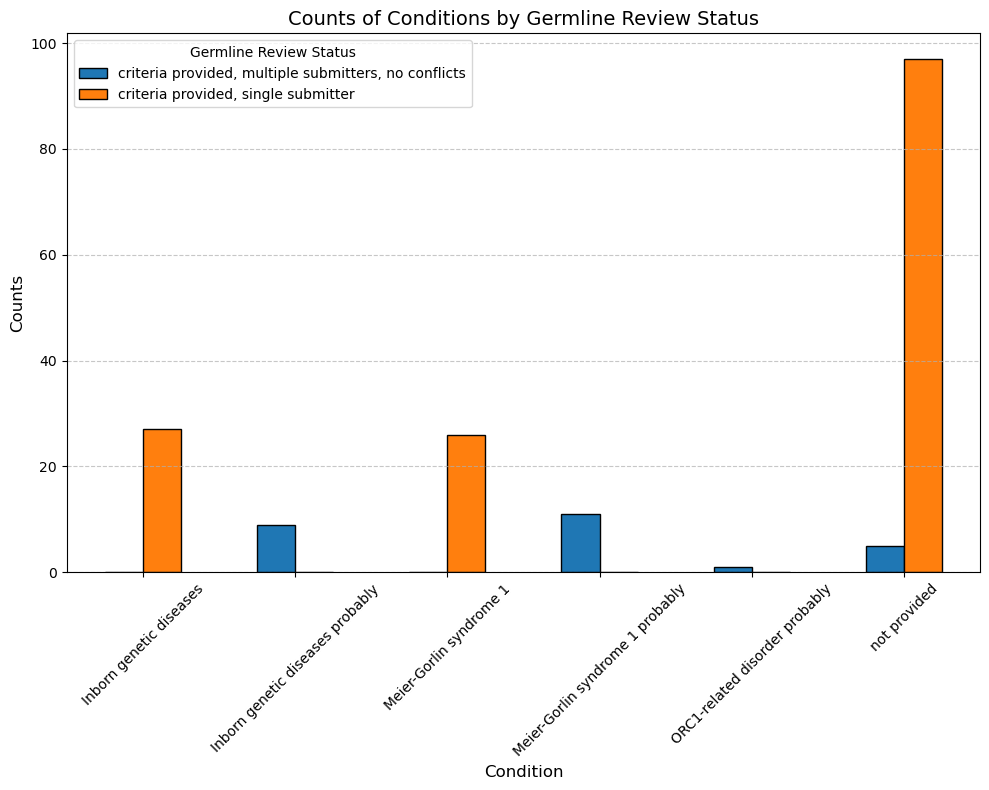

In [22]:
# Data
grouped_counts = df.groupby("Germline review status")["Condition_new"].value_counts()
plot_data = grouped_counts.reset_index(name="Counts")
plot_data

# Pivot the data for better visualization
pivot_data = plot_data.pivot(index="Condition_new", columns="Germline review status", values="Counts")

# Plot as a bar chart
pivot_data.plot(kind="bar", figsize=(10, 8), edgecolor="black")

plt.title("Counts of Conditions by Germline Review Status", fontsize=14)
plt.xlabel("Condition", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Germline Review Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

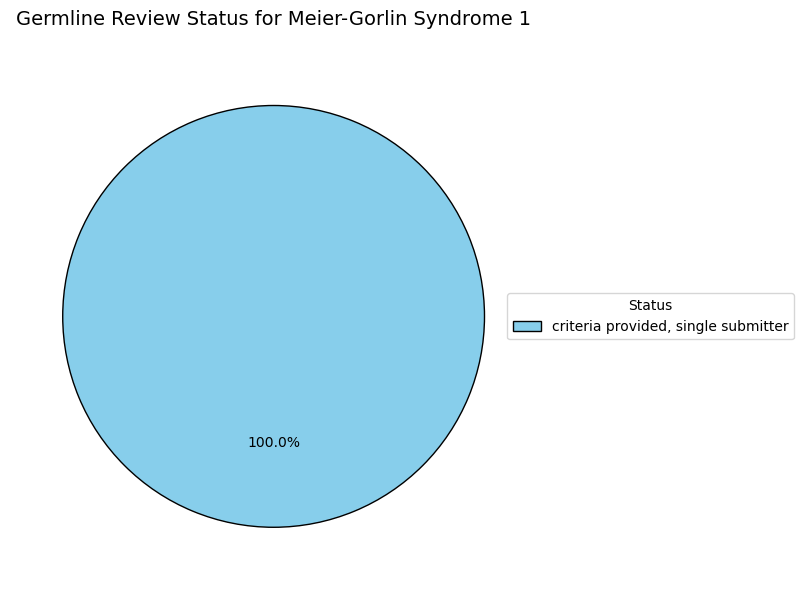

In [23]:
# Filter the data for the specific condition
filtered_data = df['Germline review status'][df["Condition_new"] =="Meier-Gorlin syndrome 1"]
# Count the occurrences of each status
status_counts = filtered_data.value_counts()

# Count the occurrences of each status
status_counts = filtered_data.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
pie_chart = status_counts.plot.pie(
    labels=None,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate start angle
    colors=['skyblue', 'lightgreen', 'orange'],  # Optional: specify colors
    wedgeprops={'edgecolor': 'black'},  # Add edge color
    title="Germline Review Status for Meier-Gorlin Syndrome 1"
)
# Add a centered title
plt.title(
    "Germline Review Status for Meier-Gorlin Syndrome 1", 
    loc="center",          # Explicitly center the title
    fontsize=14,           # Adjust font size for visibility
    pad=20                 # Add padding between the title and the chart
)

# Add a legend at the center right
plt.legend(
    labels=status_counts.index,  # Use the status names as labels
    title="Status",              # Add a title to the legend
    loc="center right",          # Position the legend at the center-right
    bbox_to_anchor=(1.50, 0.5),  # Offset for better alignment
)

plt.ylabel("")  # Remove default y-axis label
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

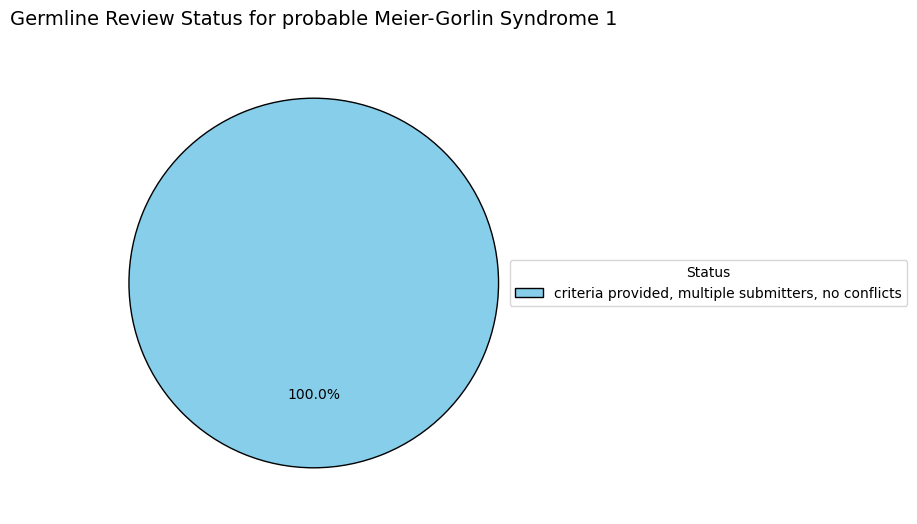

In [24]:
# Filter the data for the specific condition
filtered_data = df['Germline review status'][df["Condition_new"] =="Meier-Gorlin syndrome 1 probably"]
# Count the occurrences of each status
status_counts = filtered_data.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
status_counts.plot.pie(
    labels=None,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate start angle
    colors=['skyblue', 'lightgreen', 'orange'],  # Optional: specify colors
    wedgeprops={'edgecolor': 'black'},  # Add edge color
    title="Germline Review Status for probable Meier-Gorlin Syndrome 1"
)
# Add a centered title
plt.title(
    "Germline Review Status for probable Meier-Gorlin Syndrome 1", 
    ha="center",          # Explicitly center the title
    fontsize=14,           # Adjust font size for visibility
    pad=20
    )

# Add a legend at the center right
plt.legend(
    labels=status_counts.index,  # Use the status names as labels
    title="Status",              # Add a title to the legend
    loc="center right",          # Position the legend at the center-right
    bbox_to_anchor=(1.80, 0.5),  # Offset for better alignment
)

plt.ylabel("")  # Remove default y-axis label
plt.show()

## Filtration: Meier-Gorlin syndrome 1 and probable Meier-Gorlin syndrome 1

In [25]:
# Keep only protein changes
df = df.dropna(subset=["Protein change"])
df.shape

(156, 26)

In [26]:
# Dataset filtration
MSG = df[df["Condition_new"] == "Meier-Gorlin syndrome 1"]
#MSG = MSG[(MSG['Germline classification'] != 'Benign') & (MSG['Germline classification'] !='Benign/Likely benign')]
#MSG = MSG[(MSG['Germline classification'] == 'Likely pathogenic') | (MSG['Germline classification'] =='Pathogenic')]

MSG_probably = df[df["Condition_new"] == "Meier-Gorlin syndrome 1 probably"]
#MSG_probably = MSG_probably[(MSG_probably['Germline classification'] != 'Benign') & (MSG_probably['Germline classification'] !='Benign/Likely benign')]
#MSG_probably = MSG_probably[(MSG_probably['Germline classification'] == 'Pathogenic/Likely pathogenic')]

Top Variants with Strong Negative Effects - These mutations significantly reduce phase separation and RNA-binding ability:

A.174.V 0.64 [ 0.56, 0.72 ] - no citation
R.396.W 0.66 [ 0.52, 0.8 ] - no citation
A.372.V 0.76 [ 0.84, 0.68 ] - 22689986
G.399.D 0.76 [ 0.92, 0.6 ] - no citation
R.549.C 0.98 [ 0.96, 1 ] - no citation

Top Variants with Strong Positive Effects - These mutations enhance phase separation and RNA-binding ability:

E.73.K 0.764706  [ 0.882353, 0.647059 ] - no citation
L.617.P 0.823529 [ 0.941176, 0.705882 ] - no info
C.186.R 0.882352 [ 0.823529, 0.941176 ] - no citation
L.622.P 0.882353 [ 1, 0.764706 ] - no citation

In [27]:
def dict_of_mutations(df, condition, column_name = 'LLPS_positive', is_positive=True):
    temp = df[(df[column_name] == is_positive) & (df['Condition_new'] == condition)]['Protein change'].tolist() # list of mutations
    flat_temp = [item.strip() for sublist in temp for item in sublist.split(',')] # make flat list
    mutation_dicts = [{'position': int(re.findall(r'\d+', item)[0]), 'label': item} for item in flat_temp] # make list of dictionaries
    return mutation_dicts

In [28]:
# Prediction of top negatively affected on the LLPS and RNA binding mutations and positively affected ones.
negative_mutations = ['A174V', 'R396W', 'A372V', 'G399D', 'R549C']
positive_mutations = ['E73K', 'L617P', 'C186R', 'L622P']

# Create dictionary with mutations of visualization
mutations_MSG = create_mutation_dict(MSG)
mutations_MSG_probably = create_mutation_dict(MSG_probably)

# Make 4 extra list of dictionaly with mutations of interest
negative_mutations_MGS = dict_of_mutations(df_LLPS, 'Meier-Gorlin syndrome 1', is_positive=False)
positive_mutations_MGS = dict_of_mutations(df_LLPS, 'Meier-Gorlin syndrome 1', is_positive=True)
negative_mutations_MGS_probably = dict_of_mutations(df_LLPS, 'Meier-Gorlin syndrome 1 probably', is_positive=False)
positive_mutations_MGS_probably = dict_of_mutations(df_LLPS, 'Meier-Gorlin syndrome 1 probably', is_positive=True)

# Remove unnessesary element ftom the list of dicts
negative_mutations_MGS_probably.remove({'position': 544, 'label': 'R544C'})


Number of variats is 18
Number of variats is 10


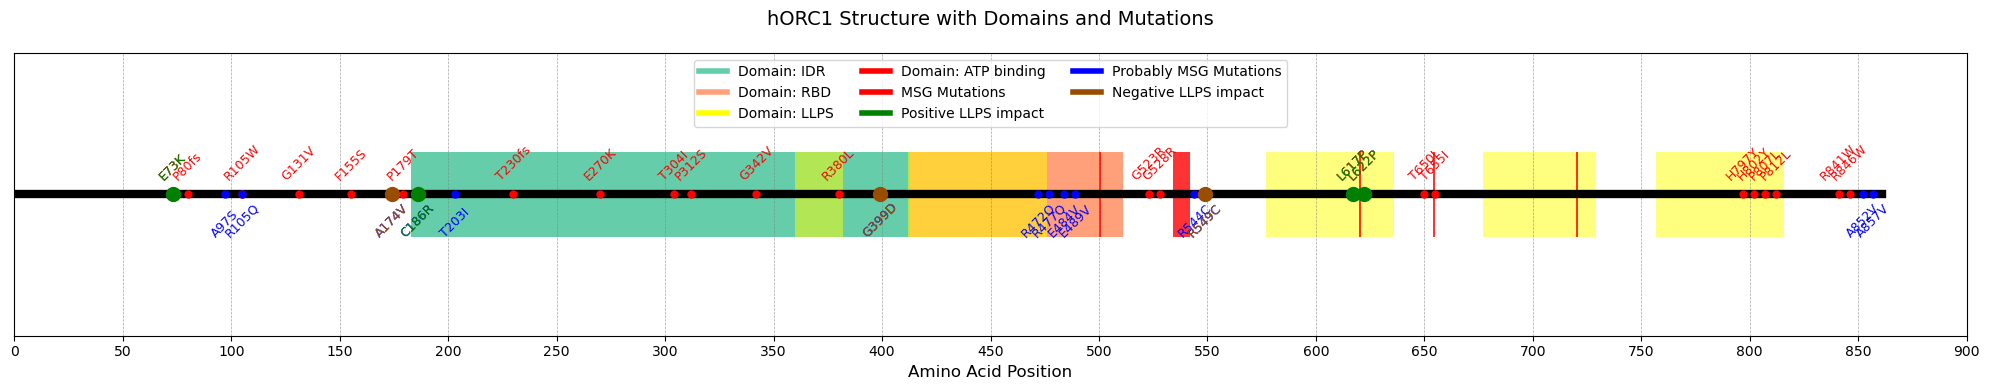

In [29]:
# Define protein information
protein_length = 861  # Protein length in amino acids
domains = [
    {"name": "IDR", "start": 183, "end": 413, "color": "mediumaquamarine", "alpha": 1},
    {"name": "RBD", "start": 413, "end": 511, "color": "lightsalmon", "alpha": 1},
    {"name": "LLPS", "start": 360, "end": 382, "color": "yellow", "alpha": 0.5},
    {"name": "LLPS", "start": 412, "end": 476, "color": "yellow", "alpha": 0.5},
    {"name": "LLPS", "start": 577, "end": 636, "color": "yellow", "alpha": 0.5},
    {"name": "LLPS", "start": 677, "end": 729, "color": "yellow", "alpha": 0.5},
    {"name": "LLPS", "start": 757, "end": 816, "color": "yellow", "alpha": 0.5},
    {"name": "ATP binding", "start": 534, "end": 542, "color": "red", "alpha": 0.8},
    {"name": "ATP binding", "start": 500, "end": 501, "color": "red", "alpha": 0.8},
    {"name": "ATP binding", "start": 620, "end": 621, "color": "red", "alpha": 0.8},
    {"name": "ATP binding", "start": 654, "end": 655, "color": "red", "alpha": 0.8},
    {"name": "ATP binding", "start": 720, "end": 721, "color": "red", "alpha": 0.8}
]

# Create the figure
fig, ax = plt.subplots(figsize=(20, 4))

# Draw the protein backbone
ax.plot([0, protein_length], [0.5, 0.5], color="black", lw=6, label="Protein Backbone")

# Track unique labels for the legend
unique_labels = {}

# Draw the domains with labels
for domain in domains:
    label = f"Domain: {domain['name']}"
    if label not in unique_labels:
        unique_labels[label] = domain["color"]
    ax.barh(0.5, domain["end"] - domain["start"], left=domain["start"], height=0.3,
            color=domain["color"], alpha=domain["alpha"], label=None)  # Add label only for legend

# Mark the mutations for MSG (above the backbone), neutral LLPS impact
for i, mutation in enumerate(mutations_MSG):
    if i == 0:
        unique_labels["MSG Mutations"] = "red"
    ax.plot(mutation["position"], 0.5, marker="o", color="red", markersize=5, label=None)
    ax.text(mutation["position"], 0.55, mutation["label"], ha="center", fontsize=9, rotation=45, color="red")

# MGS mutation, positive LLPS impact
for i, mutation in enumerate(positive_mutations_MGS):
    if i == 0:
        unique_labels["Positive LLPS impact"] = "green"
    ax.plot(mutation["position"], 0.5, marker="o", color="green", markersize=10, label=None)
    ax.text(mutation["position"], 0.55, mutation["label"], ha="center", fontsize=9, rotation=45, color="green")

# MGS mutation, negative LLPS impact
for i, mutation in enumerate(negative_mutations_MGS):
    if i == 0:
        unique_labels["Negative LLPS impact"] = "#994D00"
    ax.plot(mutation["position"], 0.5, marker="o", color="#994D00", markersize=10, label=None)
    ax.text(mutation["position"], 0.55, mutation["label"], ha="center", fontsize=9, rotation=45, color="#994D00")

# Mark the mutations for MSG_probably (below the backbone), neutral LLPS impact
for i, mutation in enumerate(mutations_MSG_probably):
    if i == 0:
        unique_labels["Probably MSG Mutations"] = "blue"
    ax.plot(mutation["position"], 0.5, marker="o", color="blue", markersize=5, label=None)
    ax.text(mutation["position"], 0.35, mutation["label"], ha="center", fontsize=9, rotation=45, color="blue")

# Probable MGS mutation, positive LLPS impact
for i, mutation in enumerate(positive_mutations_MGS_probably):
    if i == 0:
        unique_labels["Positive LLPS impact"] = "green"
    ax.plot(mutation["position"], 0.5, marker="o", color="green", markersize=10, label=None)
    ax.text(mutation["position"], 0.35, mutation["label"], ha="center", fontsize=9, rotation=45, color="green")

# Probable MGS mutation, negative LLPS impact
for i, mutation in enumerate(negative_mutations_MGS_probably):
    if i == 0:
        unique_labels["Negative LLPS impact"] = "#994D00"
    ax.plot(mutation["position"], 0.5, marker="o", color="#994D00", markersize=10, label=None)
    ax.text(mutation["position"], 0.35, mutation["label"], ha="center", fontsize=9, rotation=45, color="#994D00")

# Add the unique legend
ax.legend(handles=[plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in unique_labels.items()],
          loc="upper center", ncol=3, frameon=True, fontsize=10)

# Add gridlines for alignment
ax.grid(axis="x", color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Add labels and title
ax.set_xlim(0, protein_length)
ax.set_ylim(0, 1)
ax.set_xticks(range(0, protein_length + 50, 50))
ax.set_yticks([])
ax.set_xlabel("Amino Acid Position", fontsize=12)
ax.set_title("hORC1 Structure with Domains and Mutations", fontsize=14, pad=20)

# Show the plot
plt.tight_layout()
plt.show()


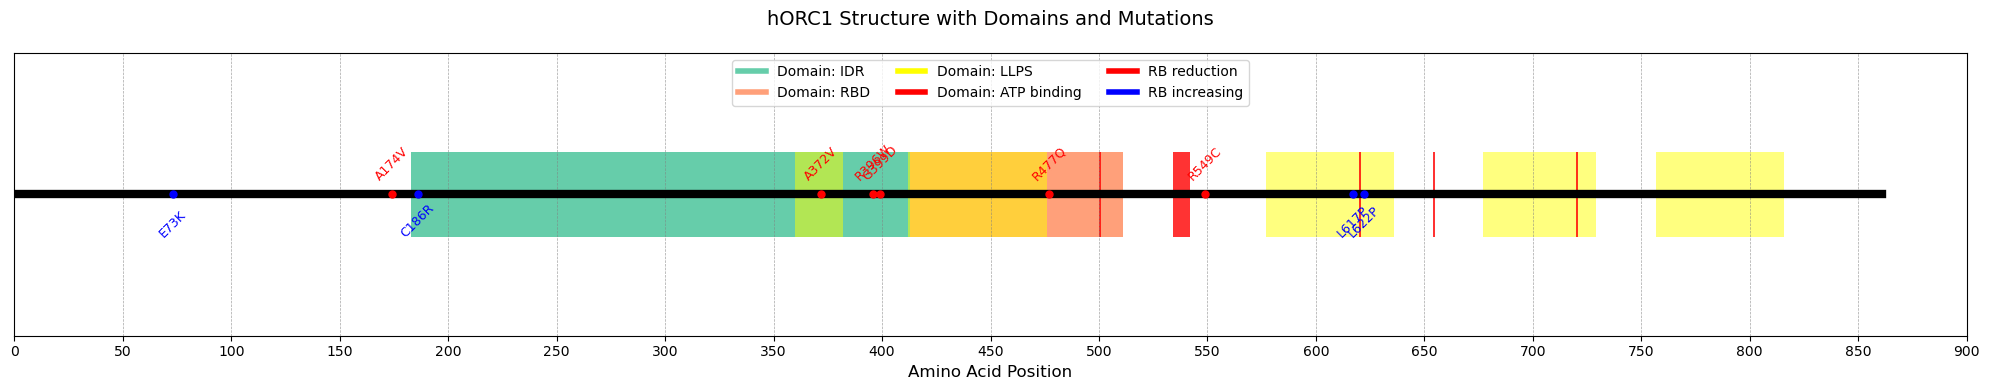

In [30]:
# List of mutations to map
RB_reduction = [{'position': 174, 'label': 'A174V'},
                      {'position': 396, 'label': 'R396W'},
                      {'position': 372, 'label': 'A372V'},
                      {'position': 399, 'label': 'G399D'},
                      {'position': 549, 'label': 'R549C'},
                      {'position': 477, 'label': 'R477Q'}]

RB_increasing = [{'position': 73, 'label': 'E73K'},
                 {'position': 617, 'label': 'L617P'},
                 {'position': 186, 'label': 'C186R'},
                 {'position': 622, 'label': 'L622P'}
]


# Define protein information
protein_length = 861  # Protein length in amino acids
domains = [
    {"name": "IDR", "start": 183, "end": 413, "color": "mediumaquamarine", "alpha": 1},
    {"name": "RBD", "start": 413, "end": 511, "color": "lightsalmon", "alpha": 1},
    {"name": "LLPS", "start": 360, "end": 382, "color": "yellow", "alpha": 0.5},
    {"name": "LLPS", "start": 412, "end": 476, "color": "yellow", "alpha": 0.5},
    {"name": "LLPS", "start": 577, "end": 636, "color": "yellow", "alpha": 0.5},
    {"name": "LLPS", "start": 677, "end": 729, "color": "yellow", "alpha": 0.5},
    {"name": "LLPS", "start": 757, "end": 816, "color": "yellow", "alpha": 0.5},
    {"name": "ATP binding", "start": 534, "end": 542, "color": "red", "alpha": 0.8},
    {"name": "ATP binding", "start": 500, "end": 501, "color": "red", "alpha": 0.8},
    {"name": "ATP binding", "start": 620, "end": 621, "color": "red", "alpha": 0.8},
    {"name": "ATP binding", "start": 654, "end": 655, "color": "red", "alpha": 0.8},
    {"name": "ATP binding", "start": 720, "end": 721, "color": "red", "alpha": 0.8}
]

# Create the figure
fig, ax = plt.subplots(figsize=(20, 4))

# Draw the protein backbone
ax.plot([0, protein_length], [0.5, 0.5], color="black", lw=6, label="Protein Backbone")

# Track unique labels for the legend
unique_labels = {}

# Draw the domains with labels
for domain in domains:
    label = f"Domain: {domain['name']}"
    if label not in unique_labels:
        unique_labels[label] = domain["color"]
    ax.barh(0.5, domain["end"] - domain["start"], left=domain["start"], height=0.3,
            color=domain["color"], alpha=domain["alpha"], label=None)  # Add label only for legend

# Mark the mutations
for i, mutation in enumerate(RB_reduction):
    if i == 0:
        unique_labels["RB reduction"] = "red"
    ax.plot(mutation["position"], 0.5, marker="o", color="red", markersize=5, label=None)
    ax.text(mutation["position"], 0.55, mutation["label"], ha="center", fontsize=9, rotation=45, color="red")

for i, mutation in enumerate(RB_increasing):
    if i == 0:
        unique_labels["RB increasing"] = "blue"
    ax.plot(mutation["position"], 0.5, marker="o", color="blue", markersize=5, label=None)
    ax.text(mutation["position"], 0.35, mutation["label"], ha="center", fontsize=9, rotation=45, color="blue")

# Add the unique legend
ax.legend(handles=[plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in unique_labels.items()],
          loc="upper center", ncol=3, frameon=True, fontsize=10)

# Add gridlines for alignment
ax.grid(axis="x", color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Add labels and title
ax.set_xlim(0, protein_length)
ax.set_ylim(0, 1)
ax.set_xticks(range(0, protein_length + 50, 50))
ax.set_yticks([])
ax.set_xlabel("Amino Acid Position", fontsize=12)
ax.set_title("hORC1 Structure with Domains and Mutations", fontsize=14, pad=20)

# Show the plot
plt.tight_layout()
plt.show()


Reduce RNA-binding and LLPS
A.174.V 0.64 [ 0.56, 0.72 ]
R.396.W 0.66 [ 0.52, 0.8 ]
A.372.V 0.76 [ 0.84, 0.68 ]
G.399.D 0.76 [ 0.92, 0.6 ]
R.549.C 0.98 [ 0.96, 1]

Increase RNA-binding and LLPS
E.73.K 0.764706  [ 0.882353, 0.647059 ]
L.617.P 0.823529 [ 0.941176, 0.705882 ]
C.186.R 0.882352 [ 0.823529, 0.941176 ]
L.622.P 0.882353 [ 1, 0.764706 ]

In [55]:
df[df['Protein change'].str.contains('R477Q', na=False)]

,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24,Condition_new
152,NM_004153.4(ORC1):c.1430G>A (p.Arg477Gln),ORC1,"R477Q, R472Q",Inborn genetic diseases|Meier-Gorlin syndrome 1,VCV000297583,1,52851575,1,52385903,297583,...,"Dec 20, 2021","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meier-Gorlin syndrome 1 probably


In [54]:
df[df['Protein change'] == 'R396W']

,Name,Gene(s),Protein change,Condition(s),Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,...,Germline date last evaluated,Germline review status,Somatic clinical impact,Somatic clinical impact date last evaluated,Somatic clinical impact review status,Oncogenicity classification,Oncogenicity date last evaluated,Oncogenicity review status,Unnamed: 24,Condition_new
192,NM_004153.4(ORC1):c.1186C>T (p.Arg396Trp),ORC1,R396W,not specified|not provided|Meier-Gorlin syndro...,VCV000211797,1,52854890,1,52389218,211797,...,"Jan 30, 2024","criteria provided, multiple submitters, no con...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meier-Gorlin syndrome 1 probably


In [52]:
df_LLPS

,Name,Protein change,Condition(s),Condition_new,Germline review status,Germline classification,LLPS_positive
98,NM_004153.4(ORC1):c.1865T>C (p.Leu622Pro),"L617P, L622P",Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1,"criteria provided, single submitter",Pathogenic,True
123,NM_004153.4(ORC1):c.1645C>T (p.Arg549Cys),"R544C, R549C",Meier-Gorlin syndrome 1|not provided|Inborn ge...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,False
189,NM_004153.4(ORC1):c.1196G>A (p.Gly399Asp),G399D,Meier-Gorlin syndrome 1|not provided|Inborn ge...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,False
192,NM_004153.4(ORC1):c.1186C>T (p.Arg396Trp),R396W,not specified|not provided|Meier-Gorlin syndro...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Benign/Likely benign,False
198,NM_004153.4(ORC1):c.1115C>T (p.Ala372Val),A372V,not provided|not specified|Meier-Gorlin syndro...,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Benign,False
264,NM_004153.4(ORC1):c.556T>C (p.Cys186Arg),C186R,Inborn genetic diseases|Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,True
270,NM_004153.4(ORC1):c.521C>T (p.Ala174Val),A174V,Meier-Gorlin syndrome 1|Inborn genetic diseases,Meier-Gorlin syndrome 1 probably,"criteria provided, multiple submitters, no con...",Uncertain significance,False
313,NM_004153.4(ORC1):c.217G>A (p.Glu73Lys),E73K,Meier-Gorlin syndrome 1,Meier-Gorlin syndrome 1,"criteria provided, single submitter",Pathogenic,True


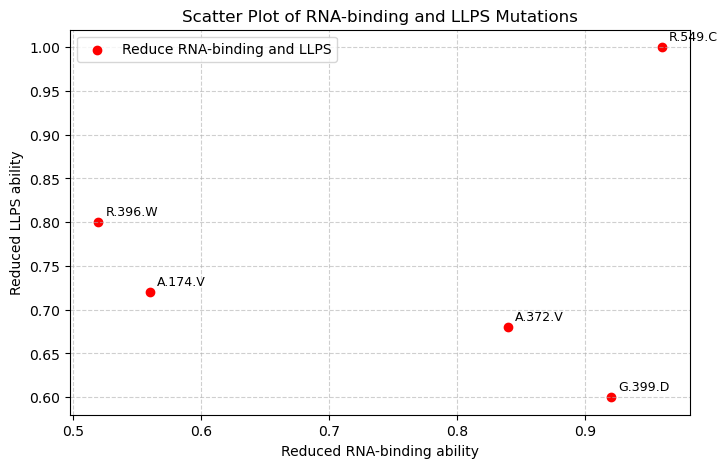

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Reduce RNA-binding and LLPS
reduce_data = {
    "Mutation": ["A.174.V", "R.396.W", "A.372.V", "G.399.D", "R.549.C"],
    "RNA-binding ability": [0.56, 0.52, 0.84, 0.92, 0.96],
    "LLPS ability": [0.72, 0.8, 0.68, 0.6, 1.0]
}


# Convert to DataFrames
df_reduce = pd.DataFrame(reduce_data)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot for Reduce RNA-binding and LLPS (Red)
ax.scatter(df_reduce["RNA-binding ability"], df_reduce["LLPS ability"], color='red', label="Reduce RNA-binding and LLPS")


# Annotate points
for i, txt in enumerate(df_reduce["Mutation"]):
    ax.annotate(txt, (df_reduce["RNA-binding ability"][i], df_reduce["LLPS ability"][i]), fontsize=9, xytext=(5,5), textcoords='offset points')

# Labels and Title
ax.set_xlabel("Reduced RNA-binding ability")
ax.set_ylabel("Reduced LLPS ability")
ax.set_title("Scatter Plot of RNA-binding and LLPS Mutations")
ax.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()



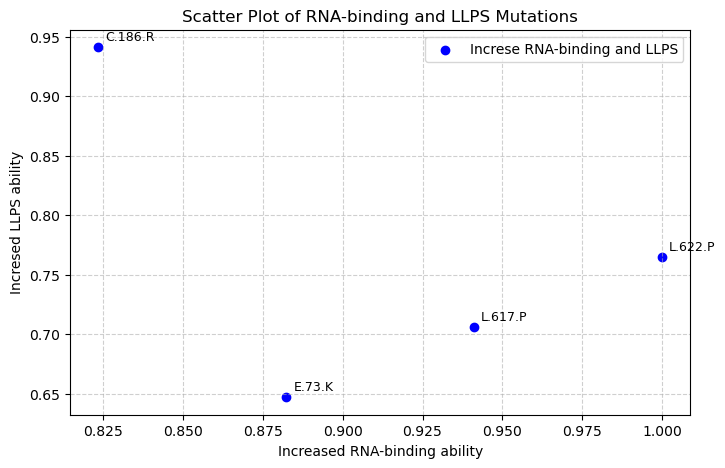

In [33]:
# Data for Increase RNA-binding and LLPS
increase_data = {
    "Mutation": ["E.73.K", "L.617.P", "C.186.R", "L.622.P"],
    "RNA-binding ability": [0.882353, 0.941176, 0.823529, 1.0],
    "LLPS ability": [0.647059, 0.705882, 0.941176, 0.764706]
}

# Convert to DataFrames
df_increase = pd.DataFrame(increase_data)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot for Reduce RNA-binding and LLPS (Red)
ax.scatter(df_increase["RNA-binding ability"], df_increase["LLPS ability"], color='blue', label="Increse RNA-binding and LLPS")


# Annotate points
for i, txt in enumerate(increase_data["Mutation"]):
    ax.annotate(txt, (df_increase["RNA-binding ability"][i], df_increase["LLPS ability"][i]), fontsize=9, xytext=(5,5), textcoords='offset points')

# Labels and Title
ax.set_xlabel("Increased RNA-binding ability")
ax.set_ylabel("Incresed LLPS ability")
ax.set_title("Scatter Plot of RNA-binding and LLPS Mutations")
ax.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


## List of mutations in every domain

In [34]:
# # List of intervals for particular feature

# #LLPS = [(360, 382), (412, 476), (577, 636), (677, 729), (757, 816)] # Chinees paper
# #IDR_total = [(183, 476)] # Chinees paper
# #G4_RNA = [(413, 511)] # Hoshina paper
# #CDCD6=[(180, 240)] # CDC6 paper
# #BP=[(354, 368), (378, 392)] # CDC6 paper
# IDR = [(183, 511)]
# RBD = [(413, 511)]

# # Positions
# IDR_pos = generate_list(IDR)
# RBD_pos = generate_list(RBD)
# # G4_RNA_positions = generate_list(G4_RNA)
# # LLPS_positions = generate_list(LLPS)
# # CDCD6_positions = generate_list(CDCD6)
# # BP_positions = generate_list(BP)

In [35]:
# criterion = 'criteria provided, conflicting classifications'
# disease = 'Meier-Gorlin syndrome 1'
# protein_mut = df['Protein change'][(df['Germline review status'] == criterion) & (df['Condition_new']==disease)]
# yes, no = mutation_analysis(protein_mut, RBD_pos)  

## Amino acids analysis

Analyse the percantage of Arginine (R) in different domains of ORC1 protein

In [36]:
# # Protein sequences
# IDR = "AAKCQKPVRAKSKSAESPSWTPAEHVAKRIESRHSASKSRQTPTHPLTPRARKRLELGNLGNPQMSQQTSCASLDSPGRIKRKVAFSEITSPSKRSQPDKLQTLSPALKAPEKTRETGLSYTEDDKKASPEHRIILRTRIAASKTIDIREERTLTPISGGQRSSVVPSVILKPENIKKRDAKEAKAQNEATSTPHRIRRKSSVLTMNRIRQQLRFLGNSKSDQEEKEILPAAEISDSSSDEEEASTPPLPRRAPRTVSRNLRSSLKSSLHTLTKVPKKSLKPRTPRCAAPQIRS"
# G4 = "AAEISDSSSDEEEASTPPLPRRAPRTVSRNLRSSLKSSLHTLTKVPKKSLKPRTPRCAAPQIRSRSLAAQEPASVLEEARLRLHVSAVPESLPCREQEF"
# CDC6 = "QESAAKCQKPVRAKSKSAESPSWTPAEHVAKRIESRHSASKSRQTPTHPLTPRARKRLELG"
# ORC="MAHYPTRLKTRKTYSWVGRPLLDRKLHYQTYREMCVKTEGCSTEIHIQIGQFVLIEGDDDENPYVAKLLELFEDDSDPPPKKRARVQWFVRFCEVPACKRHLLGRKPGAQEIFWYDYPACDSNINAETIIGLVRVIPLAPKDVVPTNLKNEKTLFVKLSWNEKKFRPLSSELFAELNKPQESAAKCQKPVRAKSKSAESPSWTPAEHVAKRIESRHSASKSRQTPTHPLTPRARKRLELGNLGNPQMSQQTSCASLDSPGRIKRKVAFSEITSPSKRSQPDKLQTLSPALKAPEKTRETGLSYTEDDKKASPEHRIILRTRIAASKTIDIREERTLTPISGGQRSSVVPSVILKPENIKKRDAKEAKAQNEATSTPHRIRRKSSVLTMNRIRQQLRFLGNSKSDQEEKEILPAAEISDSSSDEEEASTPPLPRRAPRTVSRNLRSSLKSSLHTLTKVPKKSLKPRTPRCAAPQIRSRSLAAQEPASVLEEARLRLHVSAVPESLPCREQEFQDIYNFVESKLLDHTGGCMYISGVPGTGKTATVHEVIRCLQQAAQANDVPPFQYIEVNGMKLTEPHQVYVQILQKLTGQKATANHAAELLAKQFCTRGSPQETTVLLVDELDLLWTHKQDIMYNLFDWPTHKEARLVVLAIANTMDLPERIMMNRVSSRLGLTRMCFQPYTYSQLQQILRSRLKHLKAFEDDAIQLVARKVAALSGDARRCLDICRRATEICEFSQQKPDSPGLVTIAHSMEAVDEMFSSSYITAIKNSSVLEQSFLRAILAEFRRSGLEEATFQQIYSQHVALCRMEGLPYPTMSETMAVCSHLGSCRLLLVEPSRNDLLLRVRLNVSQDDVLYALKDE"

# # Calculations
# ORC1_R = percantage_aa(seq=ORC, A="R")
# IDR_R = percantage_aa(seq=IDR, A="R")
# G4_R = percantage_aa(seq=G4, A="R")
# CDC6_R = percantage_aa(seq=CDC6, A="R")

# ORC1_G = percantage_aa(seq=ORC, A="G")
# IDR_G = percantage_aa(seq=IDR, A="G")
# G4_G = percantage_aa(seq=G4, A="G")
# CDC6_G = percantage_aa(seq=CDC6, A="G")

# print(f"Arginines in different ORC1 domains:")
# print(f"ORC1: {ORC1_R} ; IDR: {IDR_R} ; G4 binding: {G4_R} ; CDC6 binding: {CDC6_R}")

# print(f"Glycines in different ORC1 domains:")
# print(f"ORC1: {ORC1_G} ; IDR: {IDR_G} ; G4 binding: {G4_G} ; CDC6 binding: {CDC6_G}")